# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
pip install citipy

  Created wheel for citipy: filename=citipy-0.0.5-py3-none-any.whl size=559704 sha256=2873e793df60205ea62cbd95e9eaf4dd41608f627f964499f2d34dba9c3834a1
  Stored in directory: c:\users\mark schiffour\appdata\local\pip\cache\wheels\6d\df\5e\ad8eb9cc5ee7f4ba76865167c09f9a7edff405c669111d8353
Successfully built citipy
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

625

In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"


# Build partial query URL
query_url = url + "appid=" + weather_api_key + "&q=" + city

In [5]:
weather_response = requests.get(query_url)
weather_json = weather_response.json()

print(f"the weather API responded with: {weather_json}")

the weather API responded with: {'coord': {'lon': 147.0587, 'lat': -42.7826}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 283.39, 'feels_like': 282.11, 'temp_min': 282.04, 'temp_max': 284.82, 'pressure': 1007, 'humidity': 63}, 'visibility': 10000, 'wind': {'speed': 2.24, 'deg': 273, 'gust': 7.15}, 'clouds': {'all': 70}, 'dt': 1619137113, 'sys': {'type': 3, 'id': 2031307, 'country': 'AU', 'sunrise': 1619124747, 'sunset': 1619162848}, 'timezone': 36000, 'id': 2155415, 'name': 'New Norfolk', 'cod': 200}


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
for i, city in enumerate(cities):
    print(i, city)

0 flinders
1 rikitea
2 hobart
3 katsuura
4 nikolskoye
5 comodoro rivadavia
6 sentyabrskiy
7 santa marta
8 husavik
9 cherskiy
10 busselton
11 quatre cocos
12 saint-philippe
13 upernavik
14 grindavik
15 nizhneyansk
16 isangel
17 north bend
18 provideniya
19 tabou
20 klaksvik
21 faanui
22 deer lake
23 hermanus
24 qaanaaq
25 vaitupu
26 pekan
27 dikson
28 vaini
29 ushuaia
30 new norfolk
31 torbay
32 igboho
33 azare
34 puerto ayora
35 cayenne
36 henties bay
37 abu dhabi
38 alofi
39 bull savanna
40 kutum
41 hithadhoo
42 linhares
43 altagracia de orituco
44 marsh harbour
45 castro
46 mataura
47 sena madureira
48 punta arenas
49 zorritos
50 salalah
51 atuona
52 lompoc
53 cape town
54 mahebourg
55 mangrol
56 ust-tsilma
57 kodiak
58 albany
59 severo-kurilsk
60 tuktoyaktuk
61 dzaoudzi
62 georgetown
63 kaitangata
64 kapaa
65 tiksi
66 mme
67 hilo
68 ongandjera
69 illoqqortoormiut
70 pangnirtung
71 barabinsk
72 nanortalik
73 guerrero negro
74 lyubim
75 mar del plata
76 tasiilaq
77 la asuncion
78 chok

In [7]:
#URL = f"http://api.openweathermap.org/data/2.5/weather?units=imperial&appid= + {weather_api_key}&q=" 
URL = url + "units=imperial&" + "appid=" + weather_api_key + "&q=" 
#list of city
cityData = []

#grouping variables
set_count = 1
record = 1

print("Beginning Data Retrieval")
print("------------------------")

for i, city in enumerate(cities):
    #group the cities in sets of 50
    
    if(i % 50 == 0 and i >=50):
        set_count += 1
        record = 1
        
    #output the record and group 
    print(f"Processing Record {record} of Set {set_count} | {city}")
    
    #increase the records
    record += 1
    
    #url that includes a city
    cityURL = URL + city
    
    # call the open API and make a request
    try:
        cityWeather = requests.get(cityURL).json()
        
        #parse out all that stuff - Dr. A
        
        lat = cityWeather["coord"]["lat"]
        lon = cityWeather["coord"]["lon"]
        maxtemp = cityWeather["main"]["temp_max"]
        humidity = cityWeather["main"]["humidity"]
        cloudiness = cityWeather["clouds"]["all"]
        windspeed = cityWeather["wind"]["speed"]
        country = cityWeather["sys"]["country"]
        date = cityWeather["dt"]
        
        cityData.append({"City": city,
                        "Lat": lat,
                        "Lon": lon,
                        "Max Temp": maxtemp,
                         "Humidity": humidity,
                         "cloudiness": cloudiness,
                         "Wind Speed": windspeed,
                         "Country": country,
                         "Date": date
                        })
    except:
        print(f"{city} not found. Skipping...")
        pass


Beginning Data Retrieval
------------------------
Processing Record 1 of Set 1 | flinders
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | hobart
Processing Record 4 of Set 1 | katsuura
Processing Record 5 of Set 1 | nikolskoye
Processing Record 6 of Set 1 | comodoro rivadavia
Processing Record 7 of Set 1 | sentyabrskiy
sentyabrskiy not found. Skipping...
Processing Record 8 of Set 1 | santa marta
Processing Record 9 of Set 1 | husavik
Processing Record 10 of Set 1 | cherskiy
Processing Record 11 of Set 1 | busselton
Processing Record 12 of Set 1 | quatre cocos
Processing Record 13 of Set 1 | saint-philippe
Processing Record 14 of Set 1 | upernavik
Processing Record 15 of Set 1 | grindavik
Processing Record 16 of Set 1 | nizhneyansk
nizhneyansk not found. Skipping...
Processing Record 17 of Set 1 | isangel
Processing Record 18 of Set 1 | north bend
Processing Record 19 of Set 1 | provideniya
Processing Record 20 of Set 1 | tabou
Processing Record 21 of Set 1 | klak

Processing Record 40 of Set 4 | batagay
Processing Record 41 of Set 4 | macapa
Processing Record 42 of Set 4 | bethel
Processing Record 43 of Set 4 | esperance
Processing Record 44 of Set 4 | kavaratti
Processing Record 45 of Set 4 | tecpan
Processing Record 46 of Set 4 | tilichiki
Processing Record 47 of Set 4 | marystown
Processing Record 48 of Set 4 | taoudenni
Processing Record 49 of Set 4 | sitka
Processing Record 50 of Set 4 | kuito
Processing Record 1 of Set 5 | tumannyy
tumannyy not found. Skipping...
Processing Record 2 of Set 5 | brae
Processing Record 3 of Set 5 | ponta do sol
Processing Record 4 of Set 5 | san jeronimo
Processing Record 5 of Set 5 | ivanava
Processing Record 6 of Set 5 | batsfjord
Processing Record 7 of Set 5 | belaya gora
Processing Record 8 of Set 5 | esna
Processing Record 9 of Set 5 | gornyy
Processing Record 10 of Set 5 | charters towers
Processing Record 11 of Set 5 | longyearbyen
Processing Record 12 of Set 5 | carnarvon
Processing Record 13 of Set 5

Processing Record 28 of Set 8 | san carlos de bariloche
Processing Record 29 of Set 8 | marfino
Processing Record 30 of Set 8 | eureka
Processing Record 31 of Set 8 | corrente
Processing Record 32 of Set 8 | banjar
Processing Record 33 of Set 8 | belle fourche
Processing Record 34 of Set 8 | bowen
Processing Record 35 of Set 8 | vizinga
Processing Record 36 of Set 8 | ugoofaaru
Processing Record 37 of Set 8 | chapleau
Processing Record 38 of Set 8 | sao geraldo do araguaia
Processing Record 39 of Set 8 | lolua
lolua not found. Skipping...
Processing Record 40 of Set 8 | umm kaddadah
Processing Record 41 of Set 8 | ngukurr
ngukurr not found. Skipping...
Processing Record 42 of Set 8 | jalu
Processing Record 43 of Set 8 | aflu
aflu not found. Skipping...
Processing Record 44 of Set 8 | santa isabel do rio negro
Processing Record 45 of Set 8 | buala
Processing Record 46 of Set 8 | aklavik
Processing Record 47 of Set 8 | leh
Processing Record 48 of Set 8 | bonavista
Processing Record 49 of

samusu not found. Skipping...
Processing Record 11 of Set 12 | xaxim
Processing Record 12 of Set 12 | sweetwater
Processing Record 13 of Set 12 | pitkyaranta
Processing Record 14 of Set 12 | mersing
Processing Record 15 of Set 12 | saquena
Processing Record 16 of Set 12 | volot
Processing Record 17 of Set 12 | yevlax
Processing Record 18 of Set 12 | dospat
Processing Record 19 of Set 12 | yenagoa
Processing Record 20 of Set 12 | manzhouli
Processing Record 21 of Set 12 | porto nacional
Processing Record 22 of Set 12 | venice
Processing Record 23 of Set 12 | soyo
Processing Record 24 of Set 12 | nsoko
Processing Record 25 of Set 12 | varna
Processing Record 26 of Set 12 | seddon
Processing Record 27 of Set 12 | malyn
Processing Record 28 of Set 12 | la palma
Processing Record 29 of Set 12 | puerto baquerizo moreno
Processing Record 30 of Set 12 | yarim
Processing Record 31 of Set 12 | katangli
Processing Record 32 of Set 12 | hua hin
Processing Record 33 of Set 12 | kruisfontein
Process

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
cityData_pd = pd.DataFrame(cityData)
cityData_pd.head()

,City,Lat,Lon,Max Temp,Humidity,cloudiness,Wind Speed,Country,Date
0,flinders,-34.5833,150.8552,66.99,48,0,4.00,AU,1619137113
1,rikitea,-23.1203,-134.9692,78.08,75,87,14.16,PF,1619137114
2,hobart,-42.8794,147.3294,57.20,44,75,19.57,AU,1619137114
3,katsuura,35.1333,140.3000,59.00,47,5,8.99,JP,1619137043
4,nikolskoye,59.7035,30.7861,45.00,87,75,4.47,RU,1619137114


In [9]:
cityData_pd.describe()

,Lat,Lon,Max Temp,Humidity,cloudiness,Wind Speed,Date
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,5.760000e+02
mean,20.456295,22.011029,59.510382,70.086806,55.048611,8.071545,1.619137e+09
std,33.134104,89.114496,19.274570,22.312549,37.152486,5.763705,7.811339e+01
min,-54.800000,-175.200000,2.980000,1.000000,0.000000,0.290000,1.619137e+09
25%,-8.124825,-58.004200,44.600000,60.000000,20.000000,3.870000,1.619137e+09
50%,25.442700,29.484250,62.055000,75.000000,66.500000,6.910000,1.619137e+09
75%,48.958000,100.052950,77.000000,87.000000,90.000000,11.135000,1.619137e+09
max,78.218600,179.316700,92.140000,100.000000,100.000000,40.310000,1.619137e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
#  Get the indices of cities that have humidity over 100%.
index = cityData_pd.index
condition = cityData_pd["Humidity"] > 100

tooHumid = index[condition]
tooHumid

Int64Index([], dtype='int64')

In [13]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = cityData_pd.drop(tooHumid, inplace=False)
clean_city_data.head()

,City,Lat,Lon,Max Temp,Humidity,cloudiness,Wind Speed,Country,Date
0,flinders,-34.5833,150.8552,66.99,48,0,4.00,AU,1619137113
1,rikitea,-23.1203,-134.9692,78.08,75,87,14.16,PF,1619137114
2,hobart,-42.8794,147.3294,57.20,44,75,19.57,AU,1619137114
3,katsuura,35.1333,140.3000,59.00,47,5,8.99,JP,1619137043
4,nikolskoye,59.7035,30.7861,45.00,87,75,4.47,RU,1619137114


In [14]:
clean_city_data_pd = pd.DataFrame(clean_city_data)
clean_city_data_pd

,City,Lat,Lon,Max Temp,Humidity,cloudiness,Wind Speed,Country,Date
0,flinders,-34.5833,150.8552,66.99,48,0,4.00,AU,1619137113
1,rikitea,-23.1203,-134.9692,78.08,75,87,14.16,PF,1619137114
2,hobart,-42.8794,147.3294,57.20,44,75,19.57,AU,1619137114
3,katsuura,35.1333,140.3000,59.00,47,5,8.99,JP,1619137043
4,nikolskoye,59.7035,30.7861,45.00,87,75,4.47,RU,1619137114
...,...,...,...,...,...,...,...,...,...
571,bekovo,52.4663,43.7120,47.19,71,35,5.79,RU,1619137271
572,bima,-8.4667,118.7167,78.44,79,19,2.73,ID,1619137292
573,voskresenskoye,56.8381,45.4317,40.35,87,84,5.32,RU,1619137292
574,druten,51.8833,5.6000,39.99,85,17,3.87,NL,1619137293


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

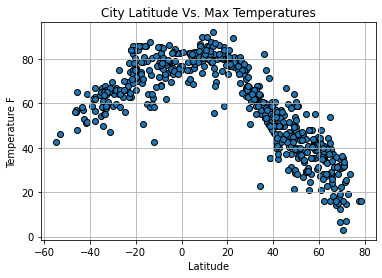

In [15]:
plt.scatter(clean_city_data_pd['Lat'],
           clean_city_data_pd['Max Temp'],
           edgecolor='black', marker='o',
           alpha=1, label='cities')

plt.title("City Latitude Vs. Max Temperatures")
plt.xlabel("Latitude")
plt.ylabel("Temperature F")
plt.grid(True)

plt.savefig("Latitude vs Temp.png")

## Latitude vs. Humidity Plot

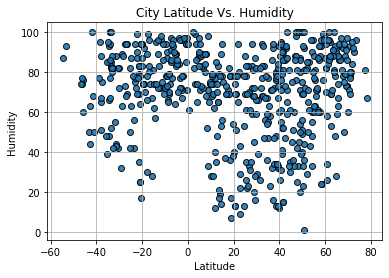

In [16]:
plt.scatter(clean_city_data_pd['Lat'],
           clean_city_data_pd['Humidity'],
           edgecolor='black', marker='o',
           alpha=0.9, label='cities')

plt.title("City Latitude Vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)

plt.savefig("Latitude vs Humidity.png")


## Latitude vs. Cloudiness Plot

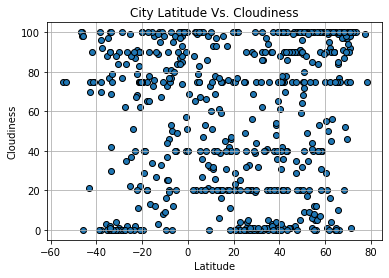

In [17]:
plt.scatter(clean_city_data_pd['Lat'],
           clean_city_data_pd['cloudiness'],
           edgecolor='black', marker='o',
           alpha=1, label='cities')

plt.title("City Latitude Vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)

plt.savefig("Latitude vs Cloudiness.png")


## Latitude vs. Wind Speed Plot

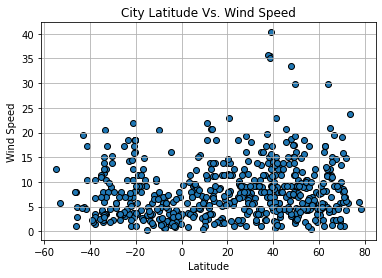

In [18]:
plt.scatter(clean_city_data_pd['Lat'],
           clean_city_data_pd['Wind Speed'],
           edgecolor='black', marker='o',
           alpha=1, label='cities')

plt.title("City Latitude Vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)

plt.savefig("Latitude vs Wind Speed.png")


## Linear Regression

In [20]:
North_cityData = clean_city_data_pd.loc[(clean_city_data_pd['Lat']>0)]
#North_cityData
South_cityData = clean_city_data_pd.loc[(clean_city_data_pd['Lat']<0)]
#South_cityData


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

r-squared: -0.9125795611921304


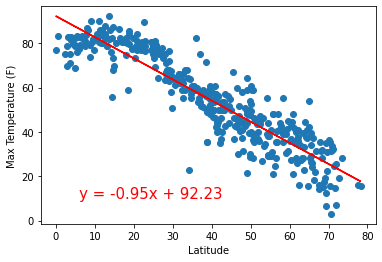

<Figure size 432x288 with 0 Axes>

In [21]:
x_values = North_cityData['Lat']
y_values = North_cityData['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
print(f"r-squared: {rvalue}")
plt.show()

plt.savefig("North Hem Temp vs Latitude.png")


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

r-squared: 0.6930188982762824


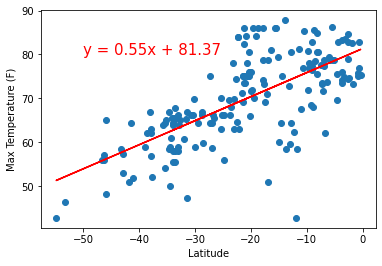

<Figure size 432x288 with 0 Axes>

In [39]:
x_values = South_cityData['Lat']
y_values = South_cityData['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,80),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
print(f"r-squared: {rvalue}")
plt.show()

plt.savefig("South Hem Temp vs Latitude.png")


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r-squared: 0.16900932511048908


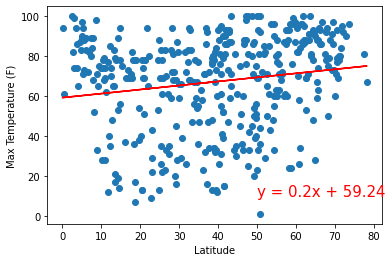

<Figure size 432x288 with 0 Axes>

In [38]:
x_values = North_cityData['Lat']
y_values = North_cityData['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
print(f"r-squared: {rvalue}")
plt.show()

plt.savefig("North Hem Humidity vs Latitude.png")


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r-squared: 0.20967611693299287


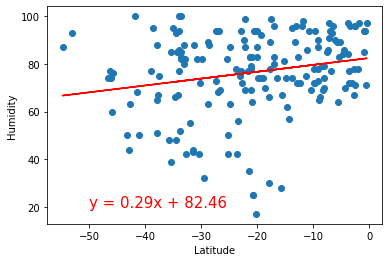

<Figure size 432x288 with 0 Axes>

In [43]:
x_values = South_cityData['Lat']
y_values = South_cityData['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"r-squared: {rvalue}")
plt.show()

plt.savefig("South Hem Humidity vs Latitude.png")


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r-squared: 0.24035297780043396


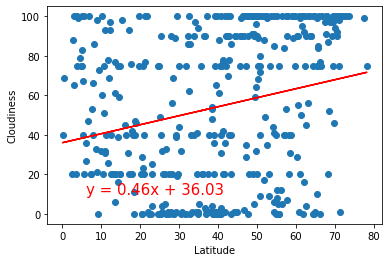

<Figure size 432x288 with 0 Axes>

In [25]:
x_values = North_cityData['Lat']
y_values = North_cityData['cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"r-squared: {rvalue}")
plt.show()

plt.savefig("North Hem Clouds vs Latitude.png")


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r-squared: 0.1437016022223495


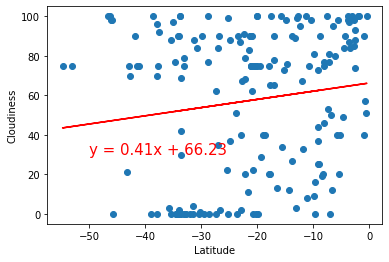

<Figure size 432x288 with 0 Axes>

In [35]:
x_values = South_cityData['Lat']
y_values = South_cityData['cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"r-squared: {rvalue}")
plt.show()

plt.savefig("South Hem Clouds vs Latitude.png")


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r-squared: 0.04468302846663054


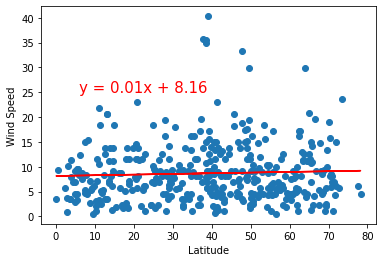

<Figure size 432x288 with 0 Axes>

In [34]:
x_values = North_cityData['Lat']
y_values = North_cityData['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"r-squared: {rvalue}")
plt.show()

plt.savefig("North Hem Winds vs Latitude.png")


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r-squared: -0.24516406820583223


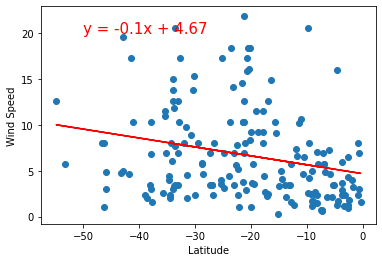

<Figure size 432x288 with 0 Axes>

In [32]:
x_values = South_cityData['Lat']
y_values = South_cityData['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"r-squared: {rvalue}")
plt.show()

plt.savefig("South Hem Winds vs Latitude.png")
